# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name=".\\Tennis_Windows_x86_64\\Tennis.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=".\\Tennis_Windows_x86_64\\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [2]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.38993645 -1.5
 -0.          0.          6.83172083  5.99607611 -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [27]:
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    for _ in range(10):
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states  
        #print(rewards)  # roll over states to next time step
       
        if np.any(dones):                                  # exit loop if episode finished
            break
    print(' Score (max over agents) from episode {}: {:7.4}'.format(i, np.max(scores)))

 Score (max over agents) from episode 1:     0.1
 Score (max over agents) from episode 2:     0.0
 Score (max over agents) from episode 3:     0.0
 Score (max over agents) from episode 4:     0.0
 Score (max over agents) from episode 5:     0.1
 Score (max over agents) from episode 6:     0.1
 Score (max over agents) from episode 7:     0.0
 Score (max over agents) from episode 8:     0.0
 Score (max over agents) from episode 9:     0.0


In [18]:
zip([rewards])

When finished, you can close the environment.

In [4]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [4]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name=".\\Tennis_Windows_x86_64\\Tennis.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
# main function that sets up environments
# perform training loop

#import envs
from buffer import ReplayBuffer
from maddpg1 import MADDPG
import torch
import numpy as np
#from tensorboardX import SummaryWriter
import os
from utilities import transpose_list, transpose_to_tensor,trans_np_to_tensor,seeding


seeding()
# number of parallel agents
#parallel_envs = 1
# number of training episodes.
# change this to higher number to experiment. say 30000.
number_of_episodes = 20000 #1000

batchsize = 1000

# amplitude of OU noise
# this slowly decreases to 0
noise = 0#1.0
noise_reduction = 0.9999

model_dir= os.getcwd()+"/model_dir"

os.makedirs(model_dir, exist_ok=True)

BUFFER_SIZE = int(1e6)    # Memory size, the last number of steps it stores
# keep 5000 episodes worth of replay
buffer = ReplayBuffer(BUFFER_SIZE)

# initialize policy and critic
maddpg = MADDPG()

num_agents = len(env_info.agents)


ddpg.py cuda


In [12]:
# training loop
# use keep_awake to keep workspace from disconnecting
from collections import deque
import numpy as np

target_score = 1.5
scores = []
scores_window = deque(maxlen=100)
max_time_step = 1000

for episode in range(0, number_of_episodes):

    score = np.zeros(num_agents)
    
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    obs = np.array(env_info.vector_observations)                  # get the current state (for each agent)

    #for calculating rewards for this particular episode - addition of all time steps

    for episode_t in range(max_time_step):
    
        # explore = only explore for a certain number of episodes
        # action input needs to be transposed
        actions = maddpg.act(trans_np_to_tensor(obs), noise=noise)
       
        #noise *= noise_reduction
        tocpu= lambda x:x.cpu()
        act = list(map(tocpu,actions))
       
        actions_for_env = torch.stack(act).detach().numpy()
        #print("env:",actions_for_env)
        actions_for_env = np.clip(actions_for_env, -1, 1) 
        # step forward one frame
        env_info = env.step(actions_for_env)[brain_name]           # send all actions to tne environment
        next_obs = np.array(env_info.vector_observations)         # get next state (for each agent)
        rewards = np.array(env_info.rewards)                      # get reward (for each agent)
        
        dones = np.array(env_info.local_done)                       # see if episode finished

        transition = [[obs],  [actions_for_env], [rewards], [next_obs], [dones]]
        buffer.push(transition)
        #print("rewards={}".format(rewards))
        
        # update once after every episode_per_update
        if len(buffer) > batchsize : #and episode % episode_per_update == 0:

            for a_i in range(num_agents):
                samples = buffer.sample(batchsize)
                #maddpg.update(samples, a_i, logger) #remove logger
                maddpg.update(samples, a_i)
            maddpg.update_targets() #soft update the target network towards the actual networks        

        score += rewards
        # roll over states to next time step
        obs = next_obs
            
        done = np.any(dones)
        if done:
            break
        

    scores_window.append(np.max(score))
    scores.append(np.max(score))
   
    np.savez("scores0830.npz", scores=scores)
    print('\rEpisode {} \tAverage Score: {:.2f} \tMax score: {:.2f} '
          .format(episode, np.mean(scores_window), np.max(scores_window)), end="")
        
    

    if episode % 100 == 0 or episode == number_of_episodes-1:
        #print(' act:{} \t rewards {} '.format(actions_for_env,reward_this_episode))
        
        torch.save(maddpg.maddpg_agent[0].actor.state_dict(), f'actor_0_checkpoint_gpu.pth')
        torch.save(maddpg.maddpg_agent[1].actor.state_dict(), f'actor_1_checkpoint_gpu.pth') 
      
        #print('\r mean_episode_rewards{:4.4} agent{}/ {} actions:{}'.format(max(avg_rewards),avg_rewards, episode,actions_for_env),end="")
    if np.mean(scores_window) > target_score and episode > 100:
        print('\r Solved goal on episode {:.2f} with average score {:.2f}'.format(episode, np.mean(scores_window)),end="")           
        #saving model
        save_dict_list =[]
        for i in range(num_agents):

            save_dict = {'actor_params' : maddpg.maddpg_agent[i].actor.state_dict(),
                         'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                         'critic_params' : maddpg.maddpg_agent[i].critic.state_dict(),
                         'critic_optim_params' : maddpg.maddpg_agent[i].critic_optimizer.state_dict()}
            save_dict_list.append(save_dict)

            torch.save(save_dict_list, 
                       os.path.join(model_dir, 'finished_reward{:4.4}-agent-{}-episode-{}.pt'.format(np.mean(scores_window),i,episode)))
        break

 Solved goal on episode 2036.00 with average score 1.51

In [ ]:
env.close()

In [4]:
import torch
import os

In [13]:
path="H:\\workspace_backup\\DL\\DRL\\deep-reinforcement-learning\\p3_collab-compet\\model_dir"

In [14]:
p_0=torch.load(os.path.join(path,'finished_reward1.514-agent-0-episode-2036.pt'))
p_1=torch.load(os.path.join(path,'finished_reward1.514-agent-1-episode-2036.pt'))
# load back the network parameters
maddpg.maddpg_agent[0].actor.load_state_dict(p_0[0]['actor_params'])
maddpg.maddpg_agent[1].actor.load_state_dict(p_1[0]['actor_params'])


<All keys matched successfully>

In [18]:
path="H:\\workspace_backup\\DL\\DRL\\deep-reinforcement-learning\\p3_collab-compet"

p_0=torch.load(os.path.join(path,'actor_0_checkpoint_gpu.pth'))
p_1=torch.load(os.path.join(path,'actor_1_checkpoint_gpu.pth'))
# load back the network parameters
maddpg.maddpg_agent[0].actor.load_state_dict(p_0)
maddpg.maddpg_agent[1].actor.load_state_dict(p_1)


<All keys matched successfully>

In [ ]:
## test the trained agent
num_agents=2
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        
        actions = maddpg.act(trans_np_to_tensor(states))
        
        tocpu= lambda x:x.cpu()
        act = list(map(tocpu,actions))
        
        actions_array = torch.stack(act).detach().numpy()
        #print("actions",actions)
        #print("array",actions_array)
        # input to step requires the first index to correspond to number of parallel agents
        actions_for_env = np.rollaxis(actions_array,1) 

        env_info = env.step(actions_for_env)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        #print("\n env",actions_for_env)
        #rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states  
        #print(rewards)  # roll over states to next time step
       
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('\r Score (max over agents) from episode {}:\t {:3.4} '.format(i, np.max(scores)),end="")
    


 Score (max over agents) from episode 3:	 0.0 

In [40]:
out_actor=[[ 0.9933759  -0.9988741 ],
 [ 0.99992293 -0.9996825 ]]

from OUNoise import OUNoise
oo=OUNoise(2, scale=1.0 )
oo.noise()

tensor([ 0.2007, -0.2127])

In [10]:
max([ 0.2007, -0.2127])

0.2007

In [1]:
from collections import deque
import numpy as np
scores = list(np.load("scores0830.npz")["scores"])
scores_window = deque(maxlen=100)
i_ep = 1
for each in scores:
    scores_window.append(each)
    print('Episode {} \tAverage Score: {:.2f}, Max score: {:.2f}, Min score: {:.2f}'.format(i_ep, np.mean(scores_window), np.max(scores_window), np.min(scores_window)))
    i_ep += 1

Episode 1 	Average Score: 1.10, Max score: 1.10, Min score: 1.10
Episode 2 	Average Score: 1.30, Max score: 1.50, Min score: 1.10
Episode 3 	Average Score: 0.87, Max score: 1.50, Min score: 0.00
Episode 4 	Average Score: 0.65, Max score: 1.50, Min score: 0.00
Episode 5 	Average Score: 0.52, Max score: 1.50, Min score: 0.00
Episode 6 	Average Score: 0.43, Max score: 1.50, Min score: 0.00
Episode 7 	Average Score: 0.37, Max score: 1.50, Min score: 0.00
Episode 8 	Average Score: 0.33, Max score: 1.50, Min score: 0.00
Episode 9 	Average Score: 0.29, Max score: 1.50, Min score: 0.00
Episode 10 	Average Score: 0.26, Max score: 1.50, Min score: 0.00
Episode 11 	Average Score: 0.24, Max score: 1.50, Min score: 0.00
Episode 12 	Average Score: 0.22, Max score: 1.50, Min score: 0.00
Episode 13 	Average Score: 0.20, Max score: 1.50, Min score: 0.00
Episode 14 	Average Score: 0.19, Max score: 1.50, Min score: 0.00
Episode 15 	Average Score: 0.17, Max score: 1.50, Min score: 0.00
Episode 16 	Average

Episode 1986 	Average Score: 1.25, Max score: 2.70, Min score: 0.00
Episode 1987 	Average Score: 1.26, Max score: 2.70, Min score: 0.00
Episode 1988 	Average Score: 1.28, Max score: 2.70, Min score: 0.00
Episode 1989 	Average Score: 1.30, Max score: 2.70, Min score: 0.00
Episode 1990 	Average Score: 1.32, Max score: 2.70, Min score: 0.00
Episode 1991 	Average Score: 1.32, Max score: 2.70, Min score: 0.00
Episode 1992 	Average Score: 1.34, Max score: 2.70, Min score: 0.00
Episode 1993 	Average Score: 1.36, Max score: 2.70, Min score: 0.00
Episode 1994 	Average Score: 1.39, Max score: 2.70, Min score: 0.00
Episode 1995 	Average Score: 1.40, Max score: 2.70, Min score: 0.00
Episode 1996 	Average Score: 1.40, Max score: 2.70, Min score: 0.00
Episode 1997 	Average Score: 1.41, Max score: 2.70, Min score: 0.00
Episode 1998 	Average Score: 1.43, Max score: 2.70, Min score: 0.00
Episode 1999 	Average Score: 1.44, Max score: 2.70, Min score: 0.00
Episode 2000 	Average Score: 1.42, Max score: 2.

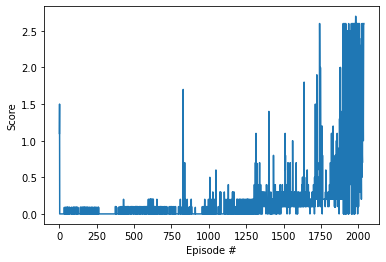

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()